# Validate Isotherms

#### Import Modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Specify Simulations

In [2]:
# Specify output directory
out_dir = "/Users/jwakim/Documents/WS_crosstalk_2024/chromo/output_isotherms"

# Load simulations
sims = os.listdir(out_dir)
sims = [sim for sim in sims if sim.startswith("sim_") and os.path.isdir(os.path.join(out_dir, sim))]
sim_inds = [int(sim.split("_")[-1]) for sim in sims]
sims = [sim for _, sim in sorted(zip(sim_inds, sims))]
sims = np.array(sims)
sim_inds = np.sort(sim_inds)

In [3]:
# Specify snapshots
snaps = {}
snap_inds = {}
for sim in sims:
    sim_dir = os.path.join(out_dir, sim)
    snaps_ = os.listdir(sim_dir)
    snaps_ = [snap for snap in snaps_ if snap.startswith("poly_") and snap.endswith(".csv")]
    snap_inds_ = [int(snap.split("-")[-1].split(".")[0]) for snap in snaps_]
    snaps_ = np.array([snap for _, snap in sorted(zip(snap_inds_, snaps_))])
    snap_inds_ = np.sort(snap_inds_)
    snaps[sim] = snaps_.copy()
    snap_inds[sim] = snap_inds_.copy()

#### Load Physical Parameters

In [4]:
all_binding_affinities = {}
all_chemical_potentials = {}

binder_file = "binders"
for sim in sims:
    binder_path = os.path.join(out_dir, sim, binder_file)
    binder_data = pd.read_csv(binder_path, sep=",", header=0, index_col=0)
    all_binding_affinities[sim] = binder_data["bind_energy_mod"][0]
    all_chemical_potentials[sim] = binder_data["chemical_potential"][0]

#### Load Binding Fractions

In [5]:
# How many snapshots were evaluated?
for sim in sims:
    print(sim)
    print(f"Number of Snapshots: {snap_inds[sim][-1]+1}\n")

sim_1
Number of Snapshots: 20

sim_2
Number of Snapshots: 20

sim_3
Number of Snapshots: 20

sim_4
Number of Snapshots: 20

sim_5
Number of Snapshots: 20

sim_6
Number of Snapshots: 20

sim_7
Number of Snapshots: 20

sim_8
Number of Snapshots: 20

sim_9
Number of Snapshots: 20

sim_10
Number of Snapshots: 20

sim_11
Number of Snapshots: 20

sim_12
Number of Snapshots: 20

sim_13
Number of Snapshots: 20

sim_14
Number of Snapshots: 20

sim_15
Number of Snapshots: 20

sim_16
Number of Snapshots: 20

sim_17
Number of Snapshots: 20

sim_18
Number of Snapshots: 20

sim_19
Number of Snapshots: 20

sim_20
Number of Snapshots: 20

sim_21
Number of Snapshots: 20

sim_22
Number of Snapshots: 20

sim_23
Number of Snapshots: 20

sim_24
Number of Snapshots: 20

sim_25
Number of Snapshots: 20

sim_26
Number of Snapshots: 20

sim_27
Number of Snapshots: 20

sim_28
Number of Snapshots: 20

sim_29
Number of Snapshots: 20

sim_30
Number of Snapshots: 20

sim_31
Number of Snapshots: 20

sim_32
Number of 

In [6]:
# Load Binding Fractions from Equilibrated Snapshots
all_binding_fractions = {}
n_equilibrate = 10
for sim in sims:
    sim_dir = os.path.join(out_dir, sim)
    equilibrated_snaps = np.atleast_1d(snaps[sim][-n_equilibrate:])
    if len(equilibrated_snaps) == 0:
        continue
    sim_binding_fracs = []
    for snap in equilibrated_snaps:
        snap_path = os.path.join(sim_dir, snap)
        HP1 = pd.read_csv(snap_path, sep=",", header=[0, 1], index_col=0)[("states", "HP1")].to_numpy()
        sim_binding_fracs.append(np.sum(HP1) / (2 * len(HP1)))
    all_binding_fractions[sim] = np.average(sim_binding_fracs)

#### Plot Isotherms

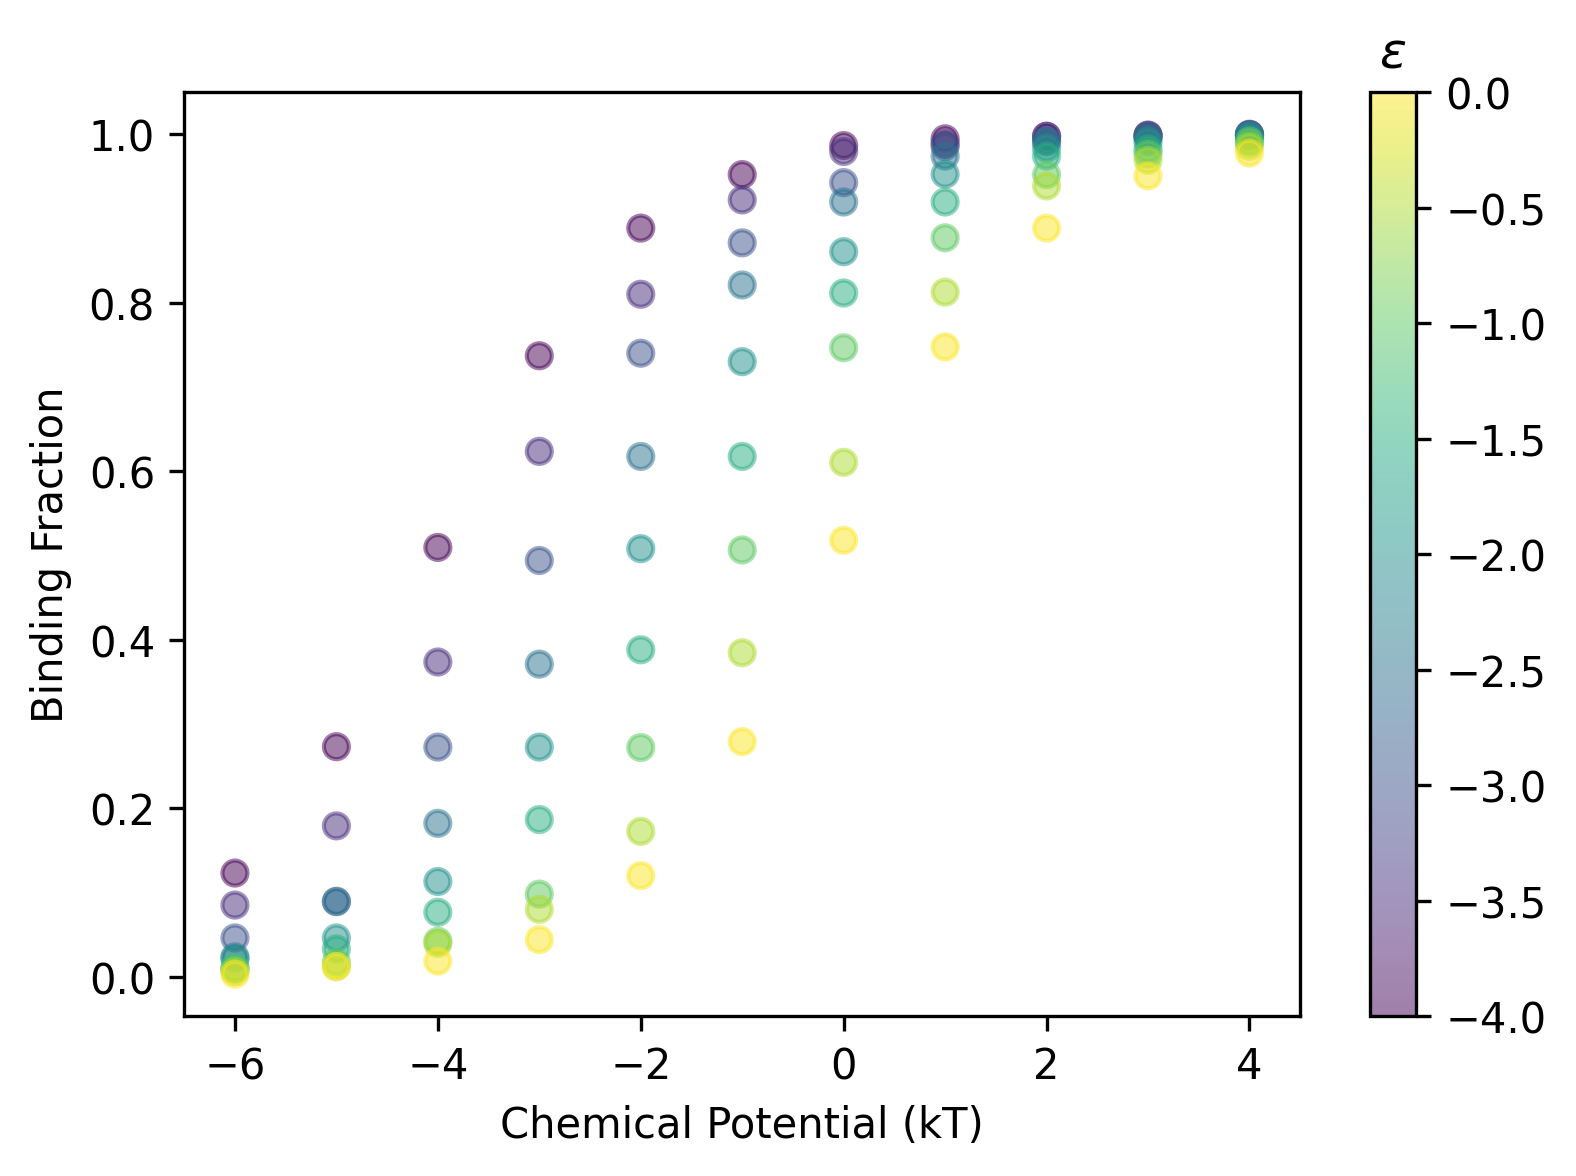

In [7]:
mu = list(all_chemical_potentials.values())
theta = list(all_binding_fractions.values())
eps = list(all_binding_affinities.values())

plt.figure(figsize=(6,4), dpi=300)
plt.scatter(mu, theta, c=eps, alpha=0.5)
cbar = plt.colorbar()
cbar.ax.set_title(r"$\epsilon$")
plt.xlabel("Chemical Potential (kT)")
plt.ylabel("Binding Fraction")
plt.show()

#### Compare with Theoretical Isotherms

In [8]:
def langmuir_binding_isotherm(epsilon, mu):
    """Compute the theoretical binding fraction based on Langmuir isotherms.

    Parameters:
        epsilon (float): Binding affinity constant.
        mu (float): Chemical potential of the ligand.

    Returns:
        float: Fractional coverage of the receptor by the ligand.
    """
    return np.exp(-epsilon + mu) / (1 + np.exp(-epsilon + mu))

In [9]:
mu_min = -6
mu_max = 4
n_mu = 1001
mu_theory_unfiltered = np.linspace(mu_min, mu_max, 1001)
eps_theory = np.unique(eps)
mu_theory = {eps_: [] for eps_ in eps_theory}
theta_theory = {eps_: [] for eps_ in eps_theory}

for eps_ in eps_theory:
    for mu_ in mu_theory_unfiltered:
        mu_theory[eps_].append(mu_)
        theta_theory[eps_].append(langmuir_binding_isotherm(eps_, mu_))

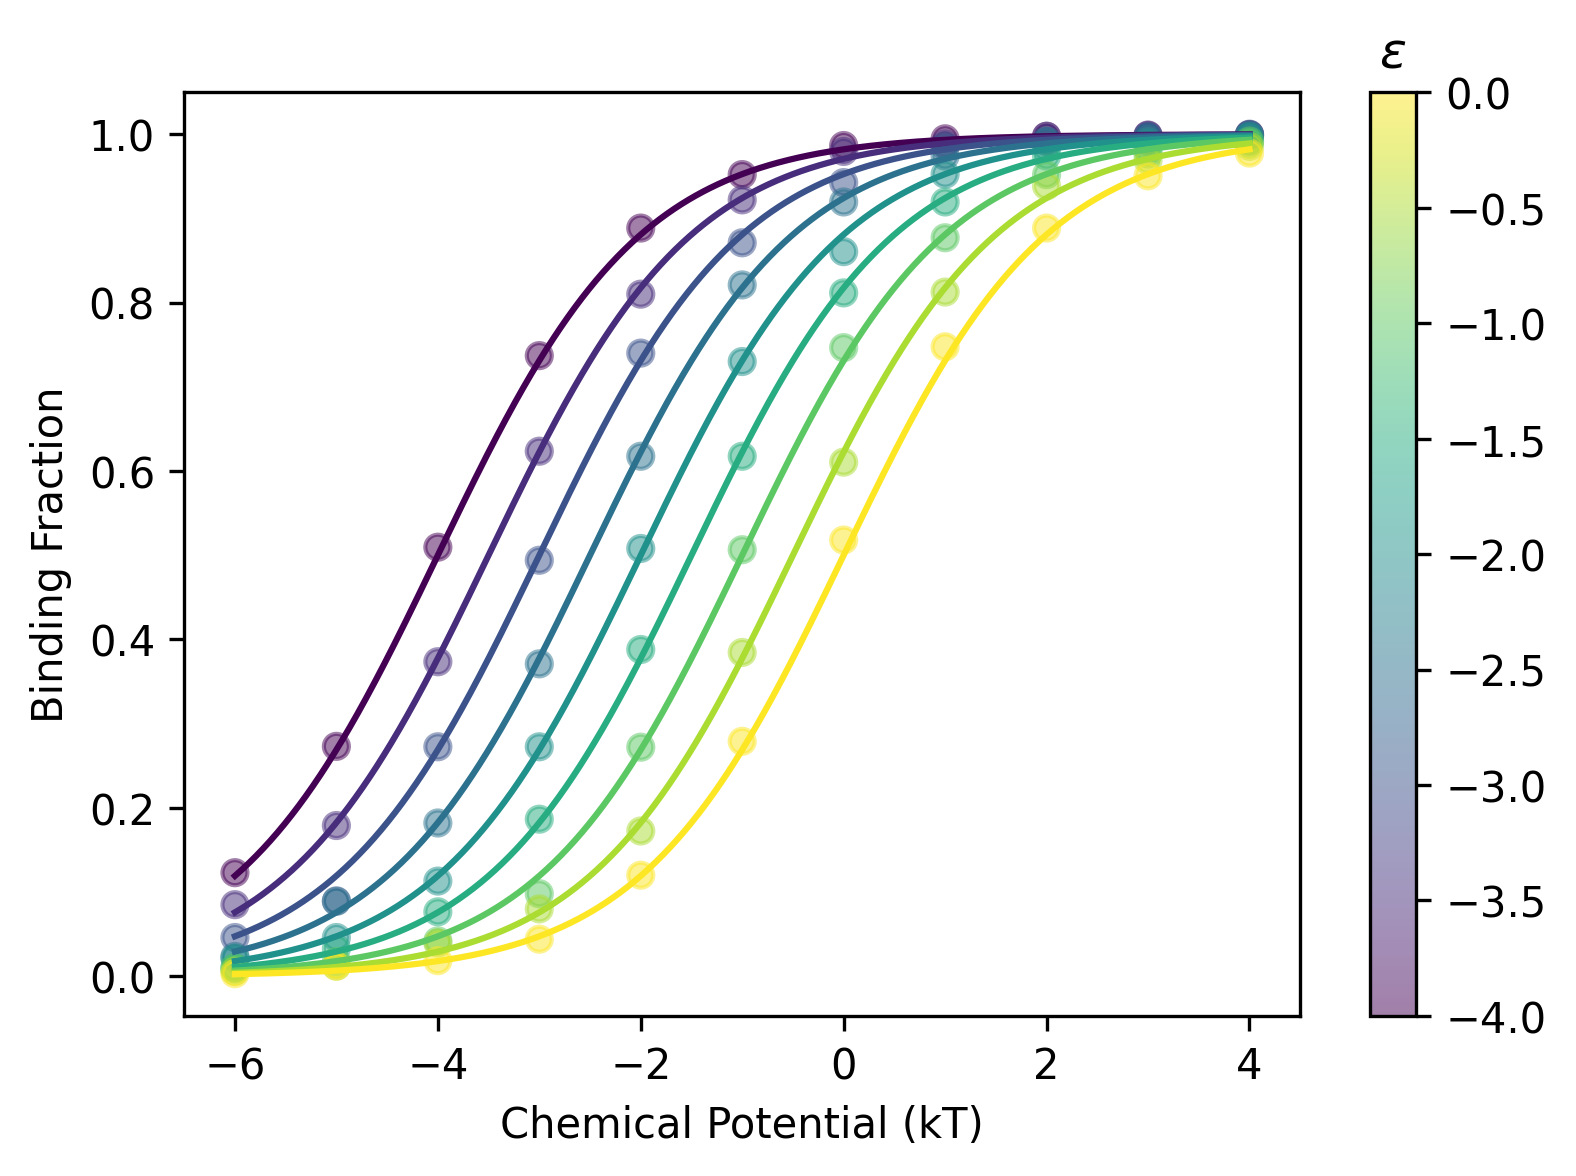

In [10]:
mu = list(all_chemical_potentials.values())
theta = list(all_binding_fractions.values())
eps = list(all_binding_affinities.values())

little_val = 0.001
min_eps = np.min(eps)-little_val
max_eps = np.max(eps)+little_val

plt.figure(figsize=(6,4), dpi=300)
plt.scatter(mu, theta, c=eps, alpha=0.5, vmin=min_eps, vmax=max_eps)
for eps_, mu_ in mu_theory.items():
    cval = (eps_-min_eps) / (max_eps-min_eps)
    plt.plot(mu_, theta_theory[eps_], c=plt.cm.viridis(cval))
cbar = plt.colorbar()
cbar.ax.set_title(r"$\epsilon$")
plt.xlabel("Chemical Potential (kT)")
plt.ylabel("Binding Fraction")
plt.show()

#### Check for Convergence

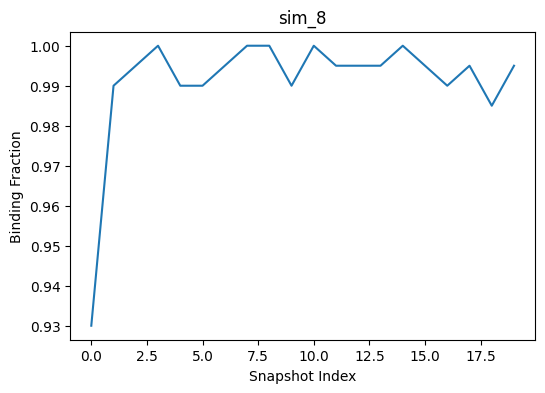

In [11]:
sim = "sim_8"
sim_dir = os.path.join(out_dir, sim)
snaps_ = snaps[sim]
sim_binding_fracs = []
for snap in snaps_:
    snap_path = os.path.join(sim_dir, snap)
    HP1 = pd.read_csv(snap_path, sep=",", header=[0, 1], index_col=0)[("states", "HP1")].to_numpy()
    sim_binding_fracs.append(np.sum(HP1) / (2 * len(HP1)))

plt.figure(figsize=(6,4), dpi=100)
plt.plot(sim_binding_fracs)
plt.xlabel("Snapshot Index")
plt.ylabel("Binding Fraction")
plt.title(sim)
plt.show()

In [13]:
# Verify that the maximum binding fraction is near 1
print(theta_theory[eps_][-1])

0.9820137900379085
